**Modified Code for novelty preference analysis. Adapted from socialbility analysis**

In [41]:
import pandas as pd
from scipy.stats import ttest_ind
from pathlib import Path
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

**Novelty Preference Analysis (Anymaze csv file)**

**Reading in CSV and data carpentry**

*Reading Data: The code begins by reading investigation time data from two CSV files (df1 and df2).*

*Column Renaming: Column names in the DataFrames are adjusted for consistency and clarity.*

*Data Concatenation: The DataFrames are concatenated along the rows to combine the data from both files into a single DataFrame (combined_df).*

*Grouping by Social Agents: The investigation time data is grouped based on the 'Animal notes' column to separate data for cagemate and familiar social agents.*

*Also using a map to correct my spelling mistake from my CSV file.*

In [98]:
# Read the first CSV file
df1 = pd.read_csv(r"D:\Sequioa\anymaze_data\SM\cage_1_SM_day_1_3.csv")

# Read the second CSV file
df2 = pd.read_csv(r"D:\Sequioa\anymaze_data\SM\cage_2_SM_day_2_4.csv")

# Rename columns in the first DataFrame
df1.rename(columns={
    'Novel-Right : time investigating (s)': 'Novel',
    'Familiar-Left : time investigating (s)': 'Social Agent'
})

# Rename columns in the second DataFrame
df2.rename(columns={
    'Familiar Right : time investigating (s)': 'Social Agent',
    'Novel Left : time investigating (s)': 'Novel'
})

# Concatenate the DataFrames along the rows
combined_df = pd.concat([df1, df2])
combined_df['Animal notes'] = combined_df['Animal notes'].map({
    'cagemate': 'Cagemate',
    'familiar': 'Familiar',
    'cagmate': 'Cagemate'  # Add this line to fix the misspelling
})

combined_df





,Test,Animal,Animal notes,Segment of test,Novel-Right : time investigating (s),Familiar-Left : time investigating (s),Whole-Chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s),Familiar Right : time investigating (s),Novel Left : time investigating (s)
0,1,1.1.1,Familiar,0 - 300 secs.,66.3,51.2,248.5,83.1,100.6,NaN,NaN
1,2,1.3.1,Cagemate,0 - 300 secs.,56.5,28.7,261.8,119.7,104.8,NaN,NaN
2,3,1.1.3,Cagemate,0 - 300 secs.,134.9,8.2,256.3,27.8,182.5,NaN,NaN
3,4,1.2.3,Cagemate,0 - 300 secs.,80.1,22.9,276.9,55.6,188.2,NaN,NaN
4,5,1.3.3,Familiar,0 - 300 secs.,62.9,13.4,265.3,41.0,173.0,NaN,NaN
5,6,1.4.1,Cagemate,0 - 300 secs.,90.4,13.1,265.9,36.7,176.8,NaN,NaN
6,7,1.2.1,Familiar,0 - 300 secs.,40.4,34.4,261.9,83.8,110.1,NaN,NaN
7,8,1.4.3,Familiar,0 - 300 secs.,106.4,22.3,248.4,44.1,151.2,NaN,NaN
0,1,2.1.2,Cagemate,0 - 300 secs.,NaN,NaN,265.8,101.5,118.4,22.0,48.1
1,2,2.4.2,Familiar,0 - 300 secs.,NaN,NaN,271.6,67.6,122.4,31.5,24.4


In [99]:
# Improved Code

# Read the first CSV file
df1 = pd.read_csv(r"D:\Sequioa\anymaze_data\SM\cage_1_SM_day_1_3.csv")

# Read the second CSV file
df2 = pd.read_csv(r"D:\Sequioa\anymaze_data\SM\cage_2_SM_day_2_4.csv")

# Rename columns in the first DataFrame
df1.rename(columns={
    'Novel-Right : time investigating (s)': 'Novel',
    'Familiar-Left : time investigating (s)': 'Social Agent'}, 
    inplace=True)

# Rename columns in the second DataFrame
df2.rename(columns={
    'Familiar Right : time investigating (s)': 'Social Agent',
    'Novel Left : time investigating (s)': 'Novel'},
    inplace=True)

# Concatenate the DataFrames along the rows
combined_df = pd.concat([df1, df2], ignore_index=True)

# Map 'Animal notes' column values
animal_notes_mapping = {
    'cagemate': 'Cagemate',
    'familiar': 'Familiar',
    'cagmate': 'Cagemate'  # Fix misspelling
    }
combined_df['Animal notes'] = combined_df['Animal notes'].map(
    animal_notes_mapping)

# Display the combined DataFrame
combined_df

,Test,Animal,Animal notes,Segment of test,Novel,Social Agent,Whole-Chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s)
0,1,1.1.1,Familiar,0 - 300 secs.,66.3,51.2,248.5,83.1,100.6
1,2,1.3.1,Cagemate,0 - 300 secs.,56.5,28.7,261.8,119.7,104.8
2,3,1.1.3,Cagemate,0 - 300 secs.,134.9,8.2,256.3,27.8,182.5
3,4,1.2.3,Cagemate,0 - 300 secs.,80.1,22.9,276.9,55.6,188.2
4,5,1.3.3,Familiar,0 - 300 secs.,62.9,13.4,265.3,41.0,173.0
5,6,1.4.1,Cagemate,0 - 300 secs.,90.4,13.1,265.9,36.7,176.8
6,7,1.2.1,Familiar,0 - 300 secs.,40.4,34.4,261.9,83.8,110.1
7,8,1.4.3,Familiar,0 - 300 secs.,106.4,22.3,248.4,44.1,151.2
8,1,2.1.2,Cagemate,0 - 300 secs.,48.1,22.0,265.8,101.5,118.4
9,2,2.4.2,Familiar,0 - 300 secs.,24.4,31.5,271.6,67.6,122.4


**Split the data up into cagemate and familiar**

In [80]:
# Filter rows for cagemates
cagemate_df = combined_df[combined_df['Animal notes'] == 'Cagemate']

# Filter rows for familiar
familiar_df = combined_df[combined_df['Animal notes'] == 'Familiar']

# Filter rows for cagemates using query
cagemate_df = combined_df.query("`Animal notes` == 'Cagemate'")

# Filter rows for familiar using query
familiar_df = combined_df.query("`Animal notes` == 'Familiar'")

# Filter rows for cagemates using loc
cagemate_df = combined_df.loc[combined_df['Animal notes'] == 'Cagemate']

# Filter rows for familiars using loc
familiar_df = combined_df.loc[combined_df['Animal notes'] == 'Familiar']

# Display cagemate_df and familiar_df
cagemate_df
familiar_df



,Test,Animal,Animal notes,Segment of test,Novel,Social Agent,Whole-Chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s),Discrimination_Index
0,1,1.1.1,Familiar,0 - 300 secs.,66.3,51.2,248.5,83.1,100.6,0.128511
4,5,1.3.3,Familiar,0 - 300 secs.,62.9,13.4,265.3,41.0,173.0,0.648755
6,7,1.2.1,Familiar,0 - 300 secs.,40.4,34.4,261.9,83.8,110.1,0.080214
7,8,1.4.3,Familiar,0 - 300 secs.,106.4,22.3,248.4,44.1,151.2,0.653458
9,2,2.4.2,Familiar,0 - 300 secs.,24.4,31.5,271.6,67.6,122.4,-0.127013
10,3,2.1.4,Familiar,0 - 300 secs.,46.7,26.2,255.3,74.0,103.1,0.281207
11,4,2.2.4,Familiar,0 - 300 secs.,82.3,18.1,283.0,164.0,68.2,0.639442
15,8,2.3.2,Familiar,0 - 300 secs.,22.5,26.2,256.8,74.7,95.6,-0.075975


**Summary Stats**

*The provided code calculates summary statistics for investigation time data. This analysis aims to provide key insights into the central tendency and dispersion of the investigation time measurements, allowing for a better understanding of the distribution of the data.*

In [100]:
# Calculate summary statistics
summary_stats = combined_df[['Novel', 'Social Agent']].describe()

# Calculate summary statistics for cagemates
cagemate_summary_stats = cagemate_df[cagemate_df['Animal notes'] == 'Cagemate'][['Novel', 'Social Agent']].describe()

# Calculate summary statistics for familiar
familiar_summary_stats = familiar_df[familiar_df['Animal notes'] == 'Familiar'][['Novel', 'Social Agent']].describe()

# Print summary statistics
print("Summary Statistics for Investigation Time:")
print(summary_stats)

print("Summary Statistics for Cagemate Social Agents:")
print(cagemate_summary_stats)

print("Summary Statistics for Familiar Social Agents:")
print(familiar_summary_stats)





Summary Statistics for Investigation Time:
            Novel  Social Agent
count   16.000000     16.000000
mean    63.750000     25.556250
std     29.440765     13.797486
min     22.500000      8.200000
25%     47.525000     16.925000
50%     56.650000     22.600000
75%     80.650000     29.400000
max    134.900000     59.200000
Summary Statistics for Cagemate Social Agents:
            Novel  Social Agent
count    8.000000      8.000000
mean    71.012500     23.200000
std     30.055113     16.147534
min     47.800000      8.200000
25%     52.150000     12.400000
50%     56.650000     21.600000
75%     82.675000     24.350000
max    134.900000     59.200000
Summary Statistics for Familiar Social Agents:
            Novel  Social Agent
count    8.000000      8.000000
mean    56.487500     27.912500
std     28.869927     11.597591
min     22.500000     13.400000
25%     36.400000     21.250000
50%     54.800000     26.200000
75%     70.300000     32.225000
max    106.400000     51.200000

In [103]:
## Improved Code

# Calculate summary statistics for all columns
summary_stats = combined_df[['Novel', 'Social Agent']].agg(['count', 'mean', 'std'])

# Calculate summary statistics for cagemates
cagemate_summary_stats = cagemate_df[cagemate_df['Animal notes'] == 'Cagemate'][['Novel', 'Social Agent']].agg(['count', 'mean', 'std'])

# Calculate summary statistics for familiar
familiar_summary_stats = familiar_df[familiar_df['Animal notes'] == 'Familiar'][['Novel', 'Social Agent']].agg(['count', 'mean', 'std'])

# Print summary statistics
print("Summary Statistics for Investigation Time:")
print(summary_stats.loc[['count', 'mean', 'std']])

print("Summary Statistics for Cagemate Social Agents:")
print(cagemate_summary_stats.loc[['count', 'mean', 'std']])

print("Summary Statistics for Familiar Social Agents:")
print(familiar_summary_stats.loc[['count', 'mean', 'std']])


Summary Statistics for Investigation Time:
           Novel  Social Agent
count  16.000000     16.000000
mean   63.750000     25.556250
std    29.440765     13.797486
Summary Statistics for Cagemate Social Agents:
           Novel  Social Agent
count   8.000000      8.000000
mean   71.012500     23.200000
std    30.055113     16.147534
Summary Statistics for Familiar Social Agents:
           Novel  Social Agent
count   8.000000      8.000000
mean   56.487500     27.912500
std    28.869927     11.597591


In [85]:
####improved

# Calculate summary statistics for all groups
summary_stats = combined_df.groupby('Animal notes')[['Novel', 'Social Agent']].describe()

# Print summary statistics
print("Summary Statistics for Investigation Time:")
print(summary_stats)

# Print summary statistics for cagemates
print("Summary Statistics for Cagemate Social Agents:")
print(summary_stats.loc['Cagemate'])

# Print summary statistics for familiars
print("Summary Statistics for Familiar Social Agents:")
print(summary_stats.loc['Familiar'])

Summary Statistics for Investigation Time:
             Novel                                                         \
             count     mean        std   min    25%    50%     75%    max   
Animal notes                                                                
Cagemate       8.0  71.0125  30.055113  47.8  52.15  56.65  82.675  134.9   
Familiar       8.0  56.4875  28.869927  22.5  36.40  54.80  70.300  106.4   

             Social Agent                                                       
                    count     mean        std   min    25%   50%     75%   max  
Animal notes                                                                    
Cagemate              8.0  23.2000  16.147534   8.2  12.40  21.6  24.350  59.2  
Familiar              8.0  27.9125  11.597591  13.4  21.25  26.2  32.225  51.2  
Summary Statistics for Cagemate Social Agents:
Novel         count      8.000000
              mean      71.012500
              std       30.055113
              min

In [45]:
# Calculate summary statistics
summary_stats = combined_df[['Novel', 'Social Agent']].describe()

# Calculate summary statistics for cagemates
cagemate_summary_stats = combined_df[combined_df['Animal notes'] == 'Cagemate'][['Novel', 'Social Agent']].describe()

# Calculate summary statistics for familiar
familiar_summary_stats = combined_df[combined_df['Animal notes'] == 'Familiar'][['Novel', 'Social Agent']].describe()

# Print summary statistics
print("Summary Statistics for Investigation Time:")
print(summary_stats)

print("Summary Statistics for Cagemate Social Agents:")
print(cagemate_summary_stats)

print("\nSummary Statistics for Familiar Social Agents:")
print(familiar_summary_stats)



Summary Statistics for Investigation Time:
            Novel  Social Agent
count   16.000000     16.000000
mean    63.750000     25.556250
std     29.440765     13.797486
min     22.500000      8.200000
25%     47.525000     16.925000
50%     56.650000     22.600000
75%     80.650000     29.400000
max    134.900000     59.200000
Summary Statistics for Cagemate Social Agents:
            Novel  Social Agent
count    8.000000      8.000000
mean    71.012500     23.200000
std     30.055113     16.147534
min     47.800000      8.200000
25%     52.150000     12.400000
50%     56.650000     21.600000
75%     82.675000     24.350000
max    134.900000     59.200000

Summary Statistics for Familiar Social Agents:
            Novel  Social Agent
count    8.000000      8.000000
mean    56.487500     27.912500
std     28.869927     11.597591
min     22.500000     13.400000
25%     36.400000     21.250000
50%     54.800000     26.200000
75%     70.300000     32.225000
max    106.400000     51.20000

**Independent Samples t-test:**

*I have two groups (e.g., Novel vs. Familiar Agents) and I want to compare the mean investigation time between them.*


In [91]:
# Extract the investigation time data for novel and social agent stimuli
novel_investigation_time = familiar_df['Novel']
familiar_agent_investigation_time = familiar_df['Social Agent']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(novel_investigation_time, familiar_agent_investigation_time)

# Print the results
print("Independent Samples T-test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

#improved code 

# Perform independent samples t-test and print results
t_statistic, p_value = stats.ttest_ind(familiar_df['Novel'], familiar_df['Social Agent'])

# Print the results
print("Independent Samples T-test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")



Independent Samples T-test Results:
T-statistic: 2.5977584222457586
P-value: 0.021069043605800832
Independent Samples T-test Results:
T-statistic: 2.5977584222457586
P-value: 0.021069043605800832


**Independent Samples t-test:**

*I have two groups (e.g., Novel vs. Cagemate Agents) and I want to compare the mean investigation time between them.*

In [90]:
# Extract the investigation time data for novel and social agent stimuli
novel_investigation_time = cagemate_df['Novel']
cagemate_agent_investigation_time = cagemate_df['Social Agent']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(novel_investigation_time, cagemate_agent_investigation_time)

# Print the results
print("Independent Samples T-test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

Independent Samples T-test Results:
T-statistic: 3.9636940864298267
P-value: 0.0014132311377999414


**Independent Samples t-test:**

*I have two groups (e.g., Novel vs. Social Agents) and I want to compare the mean investigation time between them.*

In [48]:
# Extract the investigation time data for novel and social agent stimuli
novel_investigation_time = combined_df['Novel']
social_agent_investigation_time = combined_df['Social Agent']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(novel_investigation_time, social_agent_investigation_time)

# Print the results
print("Independent Samples T-test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

Independent Samples T-test Results:
T-statistic: 4.698813837468011
P-value: 5.446413546607263e-05


**Plotting means**

**plot mean investigation time of novel vs social agent** 

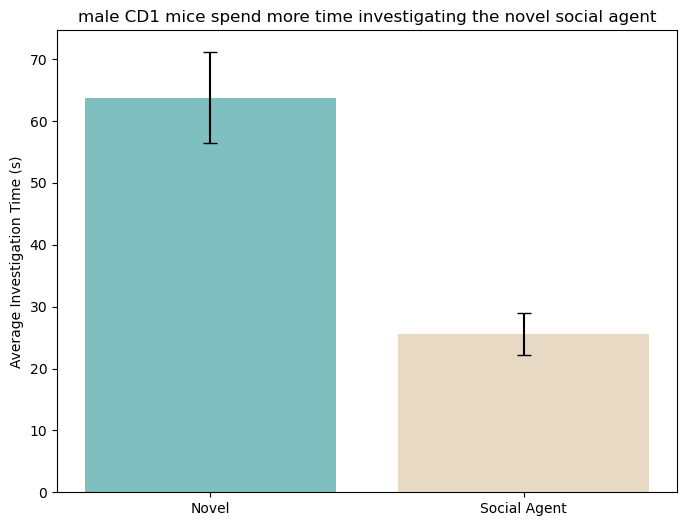

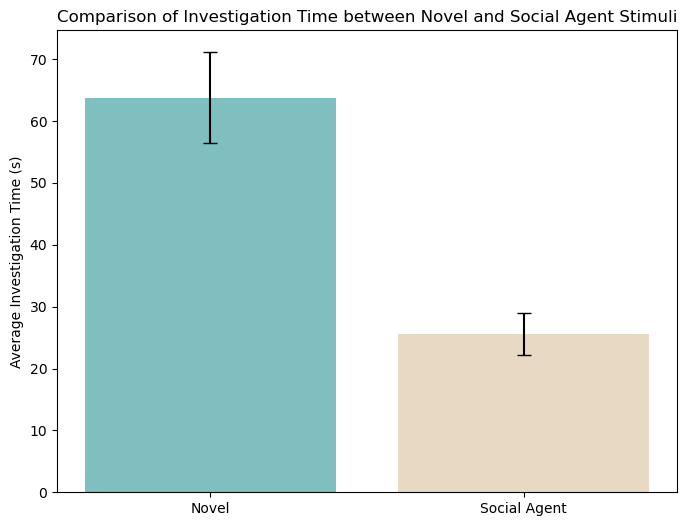

In [59]:
# Calculate the mean and SEM for 'Novel' and 'Social Agent' stimuli
novel_mean = combined_df['Novel'].mean()
social_agent_mean = combined_df['Social Agent'].mean()

novel_sem = combined_df['Novel'].sem()
social_agent_sem = combined_df['Social Agent'].sem()

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(combined_df['Novel'], combined_df['Social Agent'])

# Define x positions for the bars
x = np.arange(2)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(x, [novel_mean, social_agent_mean], color=['teal', 'tan'], alpha=0.5)

# Add error bars for SEM
plt.errorbar(
    x, [novel_mean, social_agent_mean], yerr=[novel_sem, social_agent_sem], 
    fmt='none', capsize=5, color='black')

# Add labels and title
plt.ylabel('Average Investigation Time (s)')
plt.title('male C57 mice spend more time investigating the novel social agent')

# Set x-axis ticks
plt.xticks(x, ['Novel', 'Social Agent'])

# Remove grid lines
plt.grid(False)

# Show plot
plt.show()

# Improved code

# Calculate the mean and SEM for 'Novel' and 'Social Agent' stimuli
novel_mean = combined_df['Novel'].mean()
social_agent_mean = combined_df['Social Agent'].mean()

novel_sem = combined_df['Novel'].sem()
social_agent_sem = combined_df['Social Agent'].sem()

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(combined_df['Novel'], combined_df['Social Agent'])

# Define x positions for the bars
x = np.arange(2)

# Create a bar plot with error bars for SEM
plt.figure(figsize=(8, 6))
plt.bar(
    x, [novel_mean, social_agent_mean], 
    yerr=[novel_sem, social_agent_sem], color=['teal', 'tan'], 
    alpha=0.5, capsize=5, ecolor='black')

# Add labels and title
plt.ylabel('Average Investigation Time (s)')
plt.title('Comparison of Investigation Time between Novel and Social Agent Stimuli')

# Set x-axis ticks and labels
plt.xticks(x, ['Novel', 'Social Agent'])

# Remove grid lines
plt.grid(False)

# Show plot
plt.show()



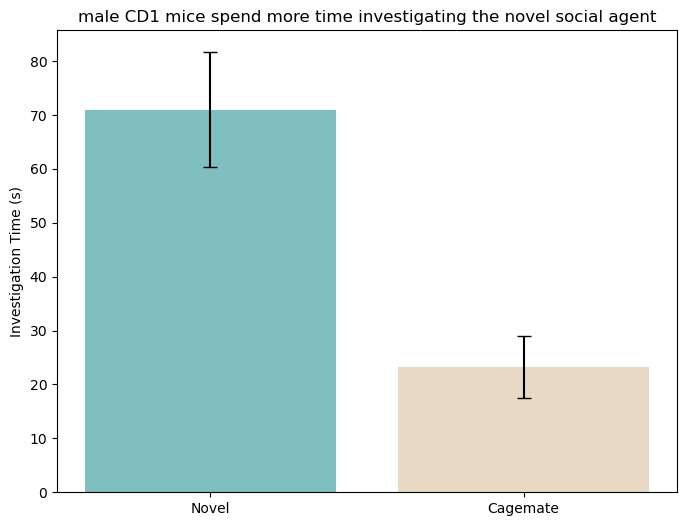

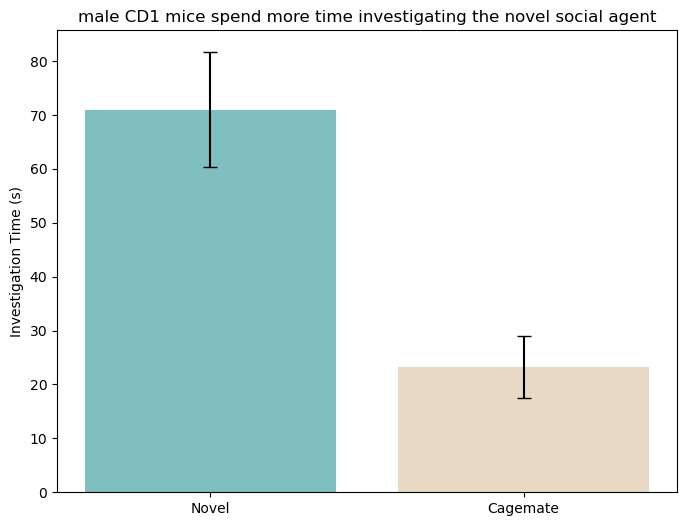

In [64]:
# Calculate the mean and SEM for 'Novel' and 'Social Agent' stimuli
novel_mean = cagemate_df['Novel'].mean()
social_agent_mean = cagemate_df['Social Agent'].mean()

novel_sem = cagemate_df['Novel'].sem()
social_agent_sem = cagemate_df['Social Agent'].sem()

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(cagemate_df['Novel'], cagemate_df['Social Agent'])

# Define x positions for the bars
x = np.arange(2)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(x, [novel_mean, social_agent_mean], color=['teal', 'tan'], alpha=0.5)

# Add error bars for SEM
plt.errorbar(
    x, [novel_mean, social_agent_mean],
    yerr=[novel_sem, social_agent_sem], 
    fmt='none', capsize=5, color='black')

# Add labels and title
plt.ylabel('Investigation Time (s)')
plt.title('male CD1 mice spend more time investigating the novel social agent')

# Set x-axis ticks
plt.xticks(x, ['Novel', 'Cagemate'])

# Remove grid lines
plt.grid(False)

# Show plot
plt.show()

# Improved Code 

# Calculate the mean and SEM for 'Novel' and 'Social Agent' stimuli
novel_mean = cagemate_df['Novel'].mean()
social_agent_mean = cagemate_df['Social Agent'].mean()

novel_sem = cagemate_df['Novel'].sem()
social_agent_sem = cagemate_df['Social Agent'].sem()

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(cagemate_df['Novel'], cagemate_df['Social Agent'])

# Define x positions for the bars
x = np.arange(2)

# Create a bar plot with error bars for SEM
plt.figure(figsize=(8, 6))
plt.bar(
    x, [novel_mean, social_agent_mean],
    yerr=[novel_sem, social_agent_sem], 
    color=['teal', 'tan'], alpha=0.5, capsize=5, ecolor='black')

# Add labels and title
plt.ylabel('Investigation Time (s)')
plt.title('male CD1 mice spend more time investigating the novel social agent')

# Set x-axis ticks and labels
plt.xticks(x, ['Novel', 'Cagemate'])

# Remove grid lines
plt.grid(False)

# Show plot
plt.show()


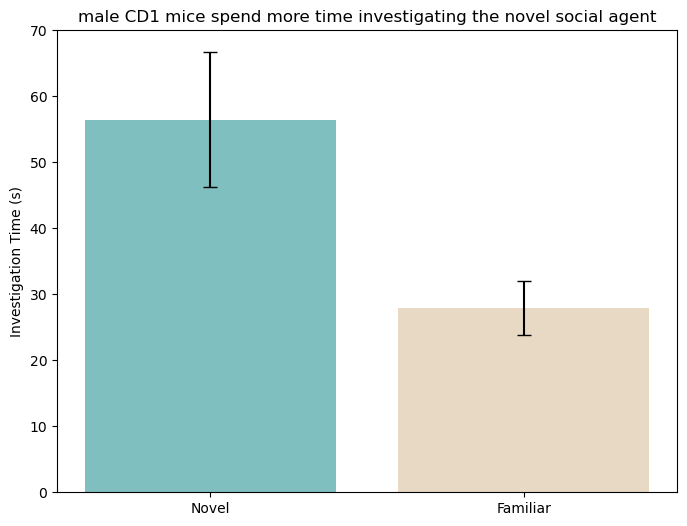

In [51]:
# Calculate the mean and SEM for 'Novel' and 'Social Agent' stimuli
novel_mean = familiar_df['Novel'].mean()
familiar_agent_mean = familiar_df['Social Agent'].mean()

novel_sem = familiar_df['Novel'].sem()
familiar_agent_sem = familiar_df['Social Agent'].sem()

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(familiar_df['Novel'], familiar_df['Social Agent'])

# Define x positions for the bars
x = np.arange(2)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(x, [novel_mean, familiar_agent_mean], color=['teal', 'tan'], alpha=0.5)

# Add error bars for SEM
plt.errorbar(x, [novel_mean, familiar_agent_mean], yerr=[novel_sem, familiar_agent_sem], fmt='none', capsize=5, color='black')

# Add labels and title
plt.ylabel('Investigation Time (s)')
plt.title('male CD1 mice spend more time investigating the novel social agent')

# Set x-axis ticks
plt.xticks(x, ['Novel', 'Familiar'])

# Remove grid lines
plt.grid(False)

# Show plot
plt.show()

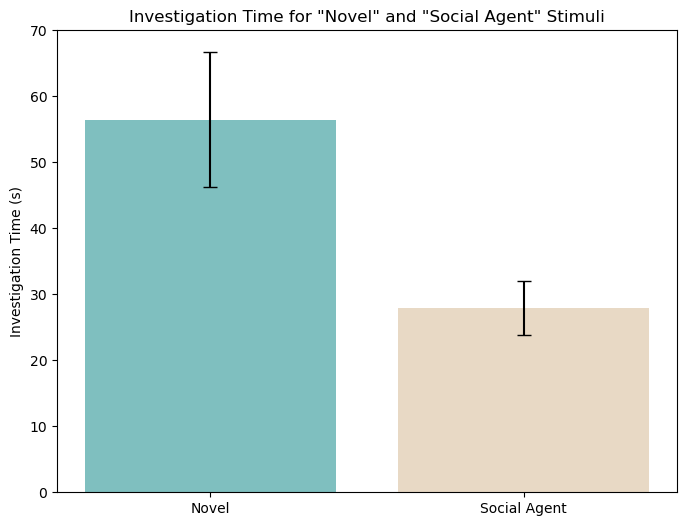

In [106]:
# Calculate mean and SEM for 'Novel' and 'Social Agent' stimuli
novel_mean = familiar_df[['Novel', 'Social Agent']].mean()
novel_sem = familiar_df[['Novel', 'Social Agent']].sem()

# Define x positions for the bars
x = np.arange(len(novel_mean))

# Create a bar plot with error bars for SEM
plt.figure(figsize=(8, 6))
plt.bar(x, novel_mean, yerr=novel_sem, capsize=5, color=['teal', 'tan'], alpha=0.5, label='Mean')
plt.ylabel('Investigation Time (s)')
plt.title('Investigation Time for "Novel" and "Social Agent" Stimuli')
plt.xticks(x, ['Novel', 'Social Agent'])
plt.grid(False)
plt.show()


In [107]:
# Set the style of the plots
sns.set(style="white")

# Create subplots with facet wrapping
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Plot for cagemate_df
novel_mean_cagemate = cagemate_df['Novel'].mean()
social_agent_mean_cagemate = cagemate_df['Social Agent'].mean()

novel_sem_cagemate = cagemate_df['Novel'].sem()
social_agent_sem_cagemate = cagemate_df['Social Agent'].sem()

# Define x positions for the bars
x_cagemate = np.arange(2)

# Plot for cagemate_df
axes[0].bar(x_cagemate, [novel_mean_cagemate, social_agent_mean_cagemate], color=['teal', 'tan'], alpha=0.5)
axes[0].errorbar(x_cagemate, [novel_mean_cagemate, social_agent_mean_cagemate], yerr=[novel_sem_cagemate, social_agent_sem_cagemate], fmt='none', capsize=5, color='black')
axes[0].set_ylabel('Average Investigation Time (s)')
axes[0].set_title('Cagemate Investigation Time')
axes[0].set_xticks(x_cagemate)
axes[0].set_xticklabels(['Novel', 'Cagemate'])
axes[0].grid(False)

# Plot for familiar_df
novel_mean_familiar = familiar_df['Novel'].mean()
familiar_agent_mean_familiar = familiar_df['Social Agent'].mean()

novel_sem_familiar = familiar_df['Novel'].sem()
familiar_agent_sem_familiar = familiar_df['Social Agent'].sem()

# Define x positions for the bars
x_familiar = np.arange(2)

# Plot for familiar_df
axes[1].bar(x_familiar, [novel_mean_familiar, familiar_agent_mean_familiar], color=['teal', 'tan'], alpha=0.5)
axes[1].errorbar(x_familiar, [novel_mean_familiar, familiar_agent_mean_familiar], yerr=[novel_sem_familiar, familiar_agent_sem_familiar], fmt='none', capsize=5, color='black')
axes[1].set_ylabel('Average Investigation Time (s)')
axes[1].set_title('Familiar Investigation Time')
axes[1].set_xticks(x_familiar)
axes[1].set_xticklabels(['Novel', 'Familiar'])
axes[1].grid(False)

# Show plot
plt.tight_layout()
plt.show()


NameError: name 'sns' is not defined

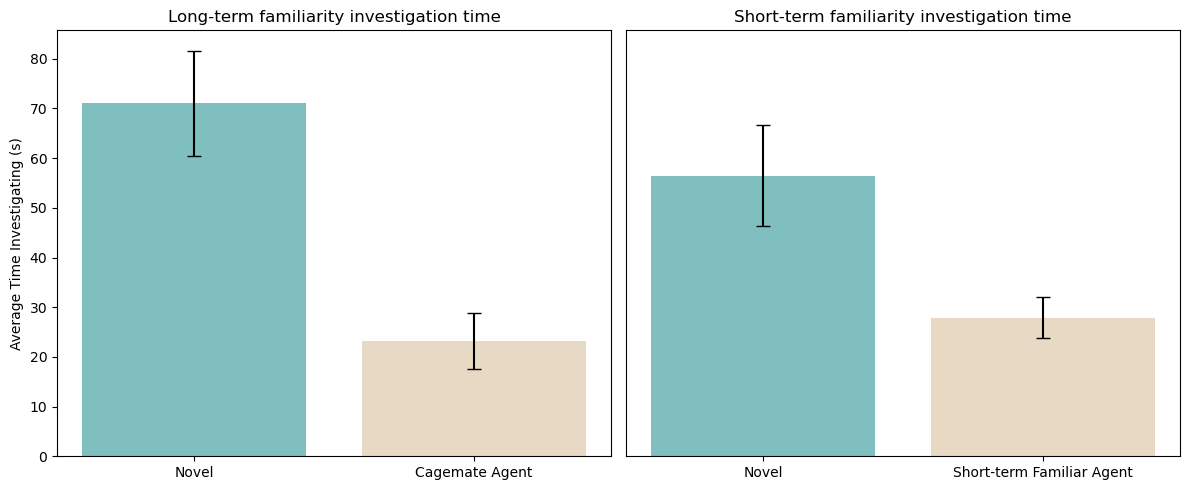

In [112]:
# Calculate summary statistics for cagemate
summary_stats_cagemate = cagemate_df[['Novel', 'Social Agent']].describe()

# Extract mean values for cagemate group
avg_novel_cagemate = summary_stats_cagemate.loc['mean', 'Novel']
avg_cagemate = summary_stats_cagemate.loc['mean', 'Social Agent']
sem_novel_cagemate = summary_stats_cagemate.loc['std', 'Novel'] / np.sqrt(len(cagemate_df))
sem_cagemate = summary_stats_cagemate.loc['std', 'Social Agent'] / np.sqrt(len(cagemate_df))

# Calculate summary statistics for familiar
summary_stats_familiar = familiar_df[['Novel', 'Social Agent']].describe()

# Extract mean values for familiar group
avg_novel_familiar = summary_stats_familiar.loc['mean', 'Novel']
avg_familiar = summary_stats_familiar.loc['mean', 'Social Agent']
sem_novel_familiar = summary_stats_familiar.loc['std', 'Novel'] / np.sqrt(len(familiar_df))
sem_familiar = summary_stats_familiar.loc['std', 'Social Agent'] / np.sqrt(len(familiar_df))

# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot for cagemate
axs[0].bar(['Novel', 'Cagemate Agent'], [avg_novel_cagemate, avg_cagemate],
            yerr=[sem_novel_cagemate, sem_cagemate], capsize=5, color=['teal', 'tan'], alpha=0.5)
axs[0].set_ylabel('Average Time Investigating (s)')
axs[0].set_title('Long-term familiarity investigation time')

# Plot for familiar
axs[1].bar(['Novel', 'Short-term Familiar Agent'], [avg_novel_familiar, avg_familiar],
            yerr=[sem_novel_familiar, sem_familiar], capsize=5, color=['teal', 'tan'], alpha=0.5)
axs[1].set_title('Short-term familiarity investigation time')
axs[1].tick_params(axis='y', which='both', left=False)  # Remove ticks from y-axis

# Show plot
plt.grid(False)  # Remove grid lines
plt.tight_layout()
plt.show()

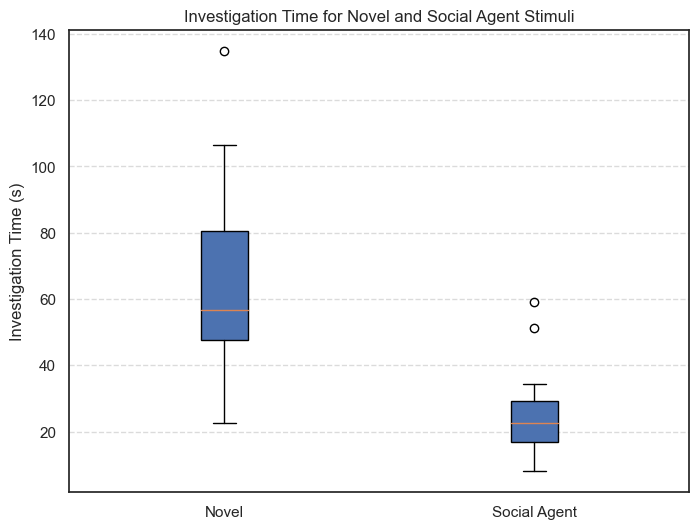

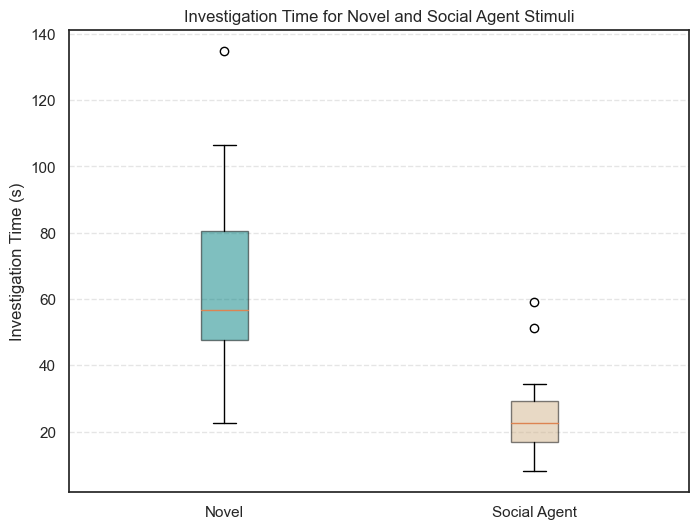

NameError: name 'stimuli' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Data for plotting
t_test = [novel_investigation_time, social_agent_investigation_time]
labels = ['Novel', 'Social Agent']

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(t_test, labels=labels, patch_artist=True)

# Add labels and title
plt.ylabel('Investigation Time (s)')
plt.title('Investigation Time for Novel and Social Agent Stimuli')

# Show plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Data for plotting
t_test = [novel_investigation_time, social_agent_investigation_time]
labels = ['Novel', 'Social Agent']
colors = ['teal', 'tan']  # Colors for Novel and Social Agent
alpha = 0.5  # Transparency value

# Create a box plot
plt.figure(figsize=(8, 6))
box = plt.boxplot(t_test, labels=labels, patch_artist=True)

# Customize boxplot colors
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(alpha)

# Add labels and title
plt.ylabel('Investigation Time (s)')
plt.title('Investigation Time for Novel and Social Agent Stimuli')

# Show plot
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# Create a bar plot for mean investigation time
plt.figure(figsize=(10, 8))
plt.bar(stimuli, mean_investigation_times, color=['teal', 'tan'], alpha=0.5)

# Add labels and title
plt.ylabel('Mean Investigation Time (s)')
plt.title('Average Investigation Time for Novel and Social Agent Stimuli')

# Show plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


# Create a bar plot for mean investigation time
plt.figure(figsize=(10, 8))
plt.bar(stimuli, mean_investigation_times, color=['teal', 'tan'], alpha=0.5)

# Add labels and title
plt.ylabel('Mean Investigation Time (s)')
plt.title('Average Investigation Time for Novel and Social Agent Stimuli')

# Iterate over each row in the DataFrame and plot individual lines
for index, row in combined_df.iterrows():
    plt.plot(stimuli, [row['Novel'], row['Social Agent']], marker='o', label=f'subject {index+1}')

# Show plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**Analysis of Investigation Time in a Three-Chamber Assay**

This code segment is part of an analysis performed on investigation time data obtained from a three-chamber assay experiment. The aim of the analysis is to compare the investigation time spent by subject mice on novel stimuli versus social agent stimuli. 

*Is there a novelty preference? eg do subject mice have a greater investigation time?*

Plotting means need to seprate the novel that go with cm and fam and make two plots

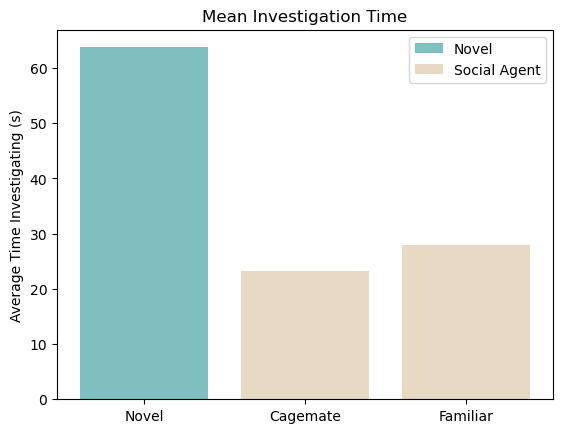

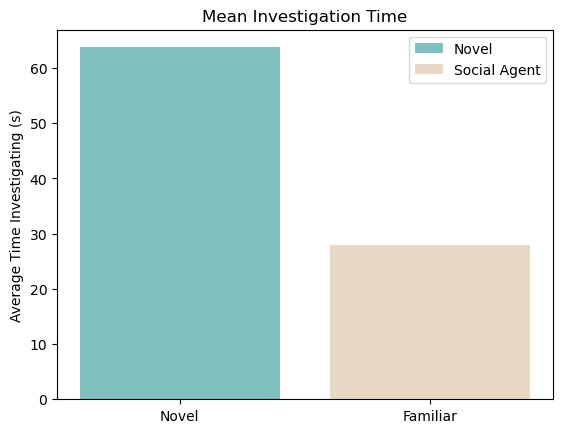

In [ ]:
# Calculate summary statistics
summary_stats = combined_df[['Novel', 'Social Agent']].describe()

# Extract mean values for each group
avg_novel = summary_stats.loc['mean', 'Novel']
avg_cagemate = cagemate_summary_stats.loc['mean', 'Social Agent']
avg_familiar = familiar_summary_stats.loc['mean', 'Social Agent']

# Create a bar plot
plt.bar('Novel', avg_novel, color='teal', alpha=0.5, label='Novel')
plt.bar(['Cagemate', 'Familiar'], [avg_cagemate, avg_familiar], color='tan', alpha=0.5, label='Social Agent')

# Add labels and title
plt.ylabel('Average Time Investigating (s)')
plt.title('Mean Investigation Time')
plt.legend()

# Show the plot
plt.show()

# Calculate summary statistics
summary_stats = combined_df[['Novel', 'Social Agent']].describe()

# Extract mean values for each group
avg_novel = summary_stats.loc['mean', 'Novel']
avg_cagemate = cagemate_summary_stats.loc['mean', 'Social Agent']


# Create a bar plot
plt.bar('Novel', avg_novel, color='teal', alpha=0.5, label='Novel')
plt.bar(['Familiar'], [avg_familiar], color='tan', alpha=0.5, label='Social Agent')

# Add labels and title
plt.ylabel('Average Time Investigating (s)')
plt.title('Mean Investigation Time')
plt.legend()

# Show the plot
plt.show()

**Plotting means with SEM**

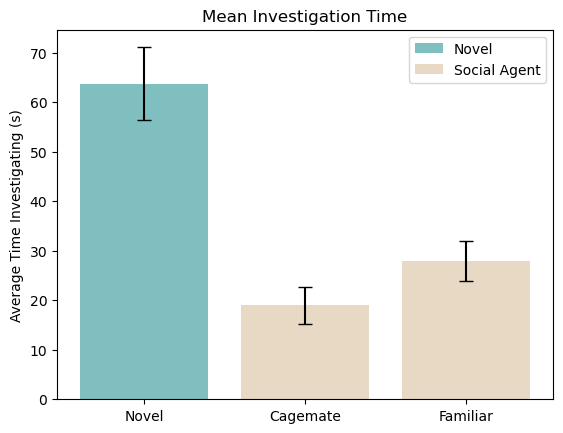

In [ ]:
# Calculate the SEM for each group
sem_novel = df['Novel'].sem()
sem_cagemate = df[df['Animal notes'] == 'cagemate']['Social Agent'].sem()
sem_familiar = df[df['Animal notes'] == 'familiar']['Social Agent'].sem()

# Calculate the average time investigating for each group
avg_novel = df['Novel'].mean()
avg_cagemate = df[df['Animal notes'] == 'cagemate']['Social Agent'].mean()
avg_familiar = df[df['Animal notes'] == 'familiar']['Social Agent'].mean()

# Create a bar plot with SEM error bars
plt.bar('Novel', avg_novel, yerr=sem_novel, capsize = 5, color='teal', alpha=0.5, label='Novel')
plt.bar(['Cagemate', 'Familiar'], [avg_cagemate, avg_familiar], 
        yerr=[sem_cagemate, sem_familiar], capsize = 5, color='tan', alpha=0.5, label='Social Agent')

# Add labels and title
plt.ylabel('Average Time Investigating (s)')
plt.title('Mean Investigation Time')
plt.legend()

# Show the plot
plt.show()

In [ ]:
#take your novel column divide it by your social agent column
#add a new column labeled discrimnation ratio
#plot those 


**Discrimination index function**

*Numerator*

**row['Novel'] - row['Social Agent']**

*This subtracts the investigation time spent with the social agent stimulus from the investigation time spent with the novel stimulus.*

*If the value is positive, it means more time was spent with the novel stimulus compared to the social agent stimulus.*

*If the value is negative, it means more time was spent with the social agent stimulus compared to the novel stimulus.*

*If the value is zero, it means equal time was spent with both stimuli.*

*Denominator*

**row['Novel'] + row['Social Agent']**

*This adds the investigation time spent with both the novel and social agent stimuli.*

*This represents the total time spent investigating both stimuli.*

**Calculation**

*After subtracting the investigation time with the social agent from the investigation time with the novel stimulus, we divide this difference by the total investigation time spent with both stimuli.*

*This normalization step ensures that the discrimination index is a relative measure, taking into account the overall exploration time by the subject.*

*The discrimination index quantifies the preference or discrimination of the subject animal towards one stimulus over another, considering the total time spent exploring both stimuli.*

*A positive discrimination index indicates a preference for the novel stimulus, while a negative discrimination index indicates a preference for the social agent stimulus.*






In [74]:
# Improved Code

def calculate_discrimination_index(Novel_it, Social_Agent_it):
    return (Novel_it - Social_Agent_it) / (Novel_it + Social_Agent_it)

combined_df['Discrimination_Index'] = combined_df.apply(lambda row: calculate_discrimination_index(row['Novel'], row['Social Agent']), axis=1)

combined_df

,Test,Animal,Animal notes,Segment of test,Novel,Social Agent,Whole-Chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s),Discrimination_Index
0,1,1.1.1,Familiar,0 - 300 secs.,66.3,51.2,248.5,83.1,100.6,0.128511
1,2,1.3.1,Cagemate,0 - 300 secs.,56.5,28.7,261.8,119.7,104.8,0.326291
2,3,1.1.3,Cagemate,0 - 300 secs.,134.9,8.2,256.3,27.8,182.5,0.885395
3,4,1.2.3,Cagemate,0 - 300 secs.,80.1,22.9,276.9,55.6,188.2,0.555340
4,5,1.3.3,Familiar,0 - 300 secs.,62.9,13.4,265.3,41.0,173.0,0.648755
5,6,1.4.1,Cagemate,0 - 300 secs.,90.4,13.1,265.9,36.7,176.8,0.746860
6,7,1.2.1,Familiar,0 - 300 secs.,40.4,34.4,261.9,83.8,110.1,0.080214
7,8,1.4.3,Familiar,0 - 300 secs.,106.4,22.3,248.4,44.1,151.2,0.653458
8,1,2.1.2,Cagemate,0 - 300 secs.,48.1,22.0,265.8,101.5,118.4,0.372325
9,2,2.4.2,Familiar,0 - 300 secs.,24.4,31.5,271.6,67.6,122.4,-0.127013


In [77]:
# Define a function to calculate discrimination index
def calculate_discrimination_index(row):
    return (row['Novel'] - row['Social Agent']) / (row['Novel'] + row['Social Agent'])

# Apply the function to calculate discrimination index for each row
combined_df['Discrimination_Index'] = combined_df.apply(calculate_discrimination_index, axis=1)

# Print or display the DataFrame with Discrimination Index added
combined_df

# Improved code

# Define a lambda function to calculate discrimination index
calculate_discrimination_index = lambda row: (row['Novel'] - row['Social Agent']) / (row['Novel'] + row['Social Agent'])

# Apply the lambda function to calculate discrimination index for each row
combined_df['Discrimination_Index'] = combined_df.apply(calculate_discrimination_index, axis=1)

# Print or display the DataFrame with Discrimination Index added
combined_df

## Improved Code 

# Improved function to calculate discrimination index
def calculate_discrimination_index(Novel_it, Social_Agent_it):
    """
    Calculate discrimination index based on Novel and Social Agent investigation times.
    
    Args:
    - Novel_it (float): Investigation time for the novel stimulus.
    - Social_Agent_it (float): Investigation time for the social agent stimulus.
    
    Returns:
    - float: Discrimination index value.
    """
    return (Novel_it - Social_Agent_it) / (Novel_it + Social_Agent_it)

# Apply the function to calculate discrimination index for each row using lambda function
combined_df['Discrimination_Index'] = combined_df.apply(
    lambda row: calculate_discrimination_index(row['Novel'], row['Social Agent']), axis=1)

# Display the DataFrame with Discrimination Index added
combined_df



,Test,Animal,Animal notes,Segment of test,Novel,Social Agent,Whole-Chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s),Discrimination_Index
0,1,1.1.1,Familiar,0 - 300 secs.,66.3,51.2,248.5,83.1,100.6,0.128511
1,2,1.3.1,Cagemate,0 - 300 secs.,56.5,28.7,261.8,119.7,104.8,0.326291
2,3,1.1.3,Cagemate,0 - 300 secs.,134.9,8.2,256.3,27.8,182.5,0.885395
3,4,1.2.3,Cagemate,0 - 300 secs.,80.1,22.9,276.9,55.6,188.2,0.555340
4,5,1.3.3,Familiar,0 - 300 secs.,62.9,13.4,265.3,41.0,173.0,0.648755
5,6,1.4.1,Cagemate,0 - 300 secs.,90.4,13.1,265.9,36.7,176.8,0.746860
6,7,1.2.1,Familiar,0 - 300 secs.,40.4,34.4,261.9,83.8,110.1,0.080214
7,8,1.4.3,Familiar,0 - 300 secs.,106.4,22.3,248.4,44.1,151.2,0.653458
8,1,2.1.2,Cagemate,0 - 300 secs.,48.1,22.0,265.8,101.5,118.4,0.372325
9,2,2.4.2,Familiar,0 - 300 secs.,24.4,31.5,271.6,67.6,122.4,-0.127013


**Plotting discrimination index by Subject**

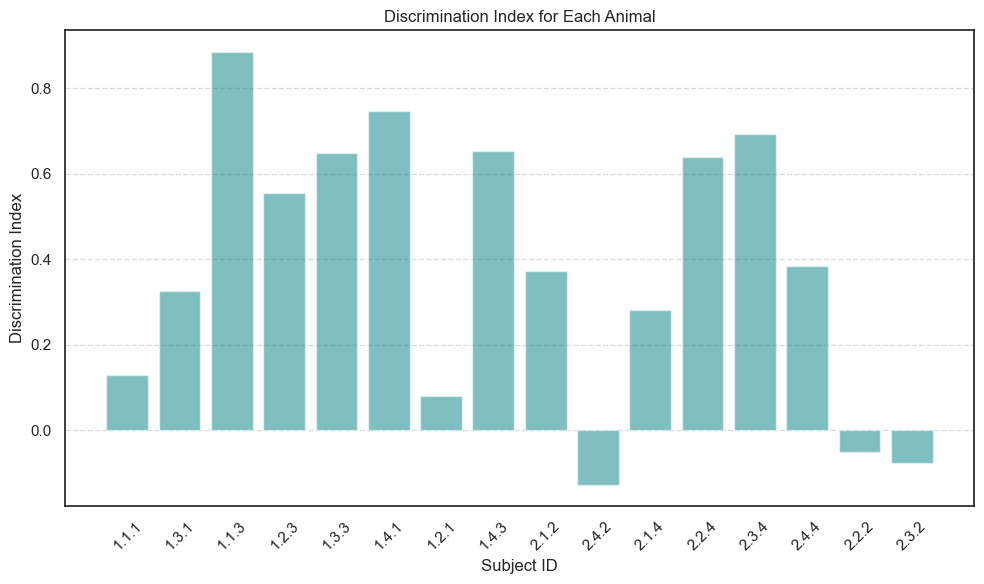

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(combined_df['Animal'], combined_df['Discrimination_Index'], color = 'teal', alpha=0.5)
plt.xlabel('Subject ID')
plt.ylabel('Discrimination Index')
plt.title('Discrimination Index for Each Animal')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


**Plotting mean discrimination index (mean DI) with the SEM for novel vs cagemate vs familiar**

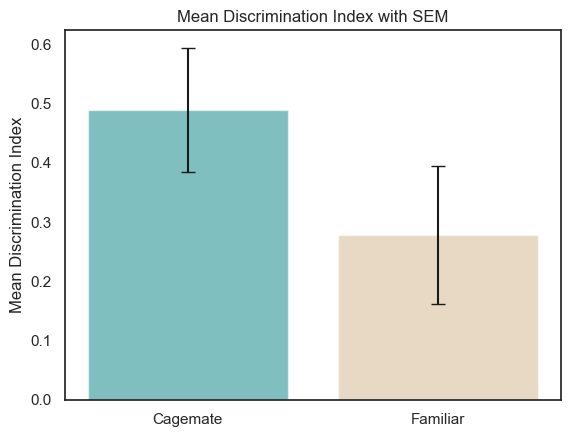

In [ ]:
# Call the mean DI and SEM for each group
mean_novel = 0.383921
sem_novel = 0.321353 / np.sqrt(16)  # SEM = std / sqrt(n)

mean_cagemate = 0.489267
sem_cagemate = 0.295581 / np.sqrt(8)

mean_familiar = 0.278575
sem_familiar = 0.329475 / np.sqrt(8)

# Filter social agents (Familiar and Cagemate)
filtered_df = combined_df[combined_df['Animal notes'].isin(['Familiar', 'Cagemate'])]

# Create bar plot with SEM error bars
labels = ['Cagemate', 'Familiar']
means = [mean_cagemate, mean_familiar]
sems = [sem_cagemate, sem_familiar]
plt.bar(labels, means, yerr=sems, capsize=5, color=['teal', 'tan'], alpha=0.5)
plt.ylabel('Mean Discrimination Index')
plt.title('Mean Discrimination Index with SEM')
plt.show()


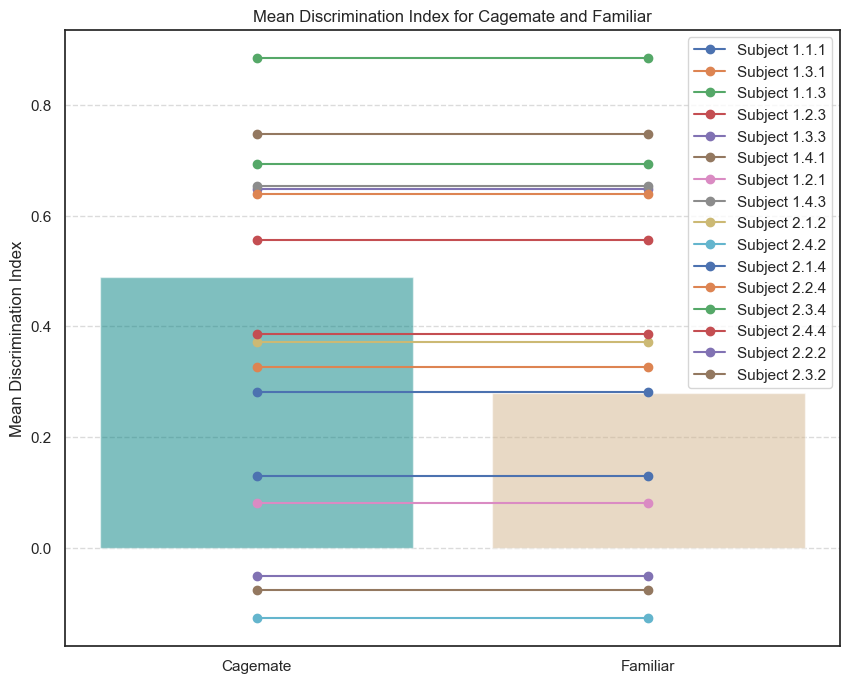

In [ ]:
# Filter social agents (Familiar and Cagemate)
filtered_df = combined_df[combined_df['Animal notes'].isin(['Familiar', 'Cagemate'])]

# Create a bar plot for mean discrimination index
plt.figure(figsize=(10, 8))
plt.bar(['Cagemate', 'Familiar'], [mean_cagemate, mean_familiar], color=['teal', 'tan'], alpha=0.5)

# Iterate over each row in the filtered DataFrame and plot individual lines
for index, row in filtered_df.iterrows():
    plt.plot(['Cagemate', 'Familiar'], [row['Discrimination_Index'], row['Discrimination_Index']], marker='o', label=f'Subject {row["Animal"]}')

# Add labels and title
plt.ylabel('Mean Discrimination Index')
plt.title('Mean Discrimination Index for Cagemate and Familiar')

# Show plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [ ]:
combined_df

,Test,Animal,Animal notes,Segment of test,Novel,Social Agent,Whole-Chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s)
0,1,1.1.1,Familiar,0 - 300 secs.,66.3,51.2,248.5,83.1,100.6
1,2,1.3.1,Cagemate,0 - 300 secs.,56.5,28.7,261.8,119.7,104.8
2,3,1.1.3,Cagemate,0 - 300 secs.,134.9,8.2,256.3,27.8,182.5
3,4,1.2.3,Cagemate,0 - 300 secs.,80.1,22.9,276.9,55.6,188.2
4,5,1.3.3,Familiar,0 - 300 secs.,62.9,13.4,265.3,41.0,173.0
5,6,1.4.1,Cagemate,0 - 300 secs.,90.4,13.1,265.9,36.7,176.8
6,7,1.2.1,Familiar,0 - 300 secs.,40.4,34.4,261.9,83.8,110.1
7,8,1.4.3,Familiar,0 - 300 secs.,106.4,22.3,248.4,44.1,151.2
8,1,2.1.2,Cagemate,0 - 300 secs.,48.1,22.0,265.8,101.5,118.4
9,2,2.4.2,Familiar,0 - 300 secs.,24.4,31.5,271.6,67.6,122.4


In [ ]:
# Calculate the average time investigating for each different social agent
avg_novel = df['Novel'].mean()
avg_cagemate = df[df['Animal notes'] == 'cagemate']['Social Agent'].mean()
avg_familiar = df[df['Animal notes'] == 'familiar']['Social Agent'].mean()

# Create a bar plot
plt.bar('Novel', avg_novel, color='teal', alpha=0.5, label='Novel')
plt.bar(['Cagemate', 'Familiar'], [avg_cagemate, avg_familiar ], color='tan', alpha=0.5, label='Social Agent')

# Add labels and title
plt.ylabel('Average Time Investigating (s)')
plt.title('CD1 males show novelty preference')
plt.legend()

# Show the plot
plt.show()


NameError: name 'df' is not defined

In [ ]:
# Calculate the SEM for each group
sem_novel = df['Novel'].sem()
sem_cagemate = df[df['Animal notes'] == 'cagemate']['Social Agent'].sem()
sem_familiar = df[df['Animal notes'] == 'familiar']['Social Agent'].sem()

# Calculate the average time investigating for each group
avg_novel = df['Novel'].mean()
avg_cagemate = df[df['Animal notes'] == 'cagemate']['Social Agent'].mean()
avg_familiar = df[df['Animal notes'] == 'familiar']['Social Agent'].mean()

# Create a bar plot with SEM error bars
plt.bar('Novel', avg_novel, yerr=sem_novel, capsize = 5, color='teal', alpha=0.5, label='Novel')
plt.bar(['Cagemate', 'Familiar'], [avg_cagemate, avg_familiar], 
        yerr=[sem_cagemate, sem_familiar], capsize = 5, color='tan', alpha=0.5, label='Social Agent')

# Add labels and title
plt.ylabel('Average Time Investigating (s)')
plt.title('CD1 males show novelty preference')
plt.legend()

# Show the plot
plt.show()

NameError: name 'df' is not defined

Not sure I can make this analysis since I have 8 novel animals and only 4 cagemate and 4 familiar? 

In [ ]:


# Extract data for familiar and novel conditions
familiar_data = combined_df[combined_df['Animal notes'] == 'Familiar']['Social Agent']
novel_data = combined_df['Novel']

# Perform t-test for familiar vs. novel
t_statistic_fn, p_value_fn = ttest_ind(familiar_data, novel_data)

# Extract data for cagemate and novel conditions
cagemate_data = combined_df[combined_df['Animal notes'] == 'Cagemate']['Social Agent']
novel_data = combined_df['Novel']

# Perform t-test for cagemate vs. novel
t_statistic_cn, p_value_cn = ttest_ind(cagemate_data, novel_data)

print("T-test results for Familiar vs. Novel:")
print("T-statistic:", t_statistic_fn)
print("P-value:", p_value_fn)
print()
print("T-test results for Cagemate vs. Novel:")
print("T-statistic:", t_statistic_cn)
print("P-value:", p_value_cn)


T-test results for Familiar vs. Novel:
T-statistic: -3.2875450878295926
P-value: 0.003359848721138821

T-test results for Cagemate vs. Novel:
T-statistic: -3.6072901033682006
P-value: 0.0015637605386903


In [ ]:

# Extract data for social agent and novel conditions
social_agent_data = combined_df['Social Agent']
novel_data = combined_df['Novel']

# Calculate mean and SEM for social agent and novel
mean_social_agent = social_agent_data.mean()
mean_novel = novel_data.mean()

sem_social_agent = social_agent_data.sem()
sem_novel = novel_data.sem()

print("Mean for Social Agent:", mean_social_agent)
print("SEM for Social Agent:", sem_social_agent)
print()
print("Mean for Novel:", mean_novel)
print("SEM for Novel:", sem_novel)


Mean for Social Agent: 25.55625
SEM for Social Agent: 3.449371546021101

Mean for Novel: 63.75
SEM for Novel: 7.3601913471503355
